# Project: PISA 2012 Results on Academic Success, Presence of Parents and General Mood


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Preliminary Wrangling</a></li>
<li><a href="#uni">Univariate Analysis</a></li>
<li><a href="#bi">Bivariate Analysis</a></li>
<li><a href="#multi">Multivariate Analysis</a></li>
</ul>

<a id='intro'></a>
## Introduction 
>PISA 2012 results will be analyzed in thisnotebook. PISA, in particular, is a "survey of students' skills andknowledge as they approach the end of compulsory education. 
>This dataset includes 600+ columns, I will belimiting my exploration on scores, the general mood of students, and the presence ofparents.  
#### **Question that can be analyzed from this dataset**
>Throughout the course of this notebook I will bequestioning the general mood of students, presence of parents,relationship/correlation among scores, presence of parents, and general mood ofstudents.

<a id='wrangling'></a>
## Preliminary Wrangling

In [79]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline
pd.set_option('display.max_columns', 636)

In [80]:
#!conda update -y -c anaconda matplotlib

In [81]:
# pisa2012.csv file size is big, read only once and filter file to get necessary columns.


pisa = pd.read_csv('pisa2012.csv', encoding='latin-1')

raw.shape

raw.head()


raw = raw[['STIDSTD','ST04Q01','CNT','PV1MATH','PV1READ','PV1SCIE','ST11Q01','ST11Q02','ST57Q05','HISCED','ST87Q01' ,'ST87Q06' ,'ST87Q07' ]]


raw.rename({'STIDSTD':'Student Id', 'ST04Q01':'Gender','CNT':'Country', 
             'PV1MATH':'Math Score', 'PV1READ':"Reading Score",'PV1SCIE':'Science Score',
             'ST11Q01':'Mother Present', 'ST11Q02':'Father Present', 
           'ST87Q01':'Feel Like Outsider', 
 'ST87Q06'  : 'Feel Lonely at School'  , 
 'ST87Q07'  : 'Feel Happy at School' },
            axis='columns', inplace=True)

raw.shape

raw.to_csv('pisa_filtered.csv')

In [82]:
df=pd.read_csv('pisa_filtered.csv')

In [83]:
df.shape

(485490, 13)

In [84]:
df.head()

,Unnamed: 0,Student Id,Gender,Country,Math Score,Reading Score,Science Score,Mother Present,Father Present,HISCED,Feel Like Outsider,Feel Lonely at School,Feel Happy at School
0,1,1,Female,Albania,406.8469,249.5762,341.7009,Yes,Yes,"ISCED 3A, ISCED 4",Agree,Strongly disagree,Agree
1,2,2,Female,Albania,486.1427,406.2936,548.9929,Yes,Yes,"ISCED 5A, 6",NaN,NaN,NaN
2,3,3,Female,Albania,533.2684,401.2100,499.6643,Yes,Yes,"ISCED 5A, 6",NaN,NaN,NaN
3,4,4,Female,Albania,412.2215,547.3630,438.6796,Yes,Yes,"ISCED 5A, 6",NaN,NaN,NaN
4,5,5,Female,Albania,381.9209,311.7707,361.5628,Yes,Yes,"ISCED 3A, ISCED 4",Strongly disagree,Strongly disagree,Strongly agree


In [85]:
df.columns

Index(['Unnamed: 0', 'Student Id', 'Gender', 'Country', 'Math Score',
       'Reading Score', 'Science Score', 'Mother Present', 'Father Present',
       'HISCED', 'Feel Like Outsider', 'Feel Lonely at School',
       'Feel Happy at School'],
      dtype='object')

In [86]:
#check if there exist null values
df.isna().sum()

Unnamed: 0                    0
Student Id                    0
Gender                        0
Country                       0
Math Score                    0
Reading Score                 0
Science Score                 0
Mother Present            24931
Father Present            44454
HISCED                    12399
Feel Like Outsider       173714
Feel Lonely at School    174538
Feel Happy at School     175209
dtype: int64

In [87]:
#drop null values
df.dropna(inplace=True)

In [88]:
#test if null values are dropped
df.isna().sum()

Unnamed: 0               0
Student Id               0
Gender                   0
Country                  0
Math Score               0
Reading Score            0
Science Score            0
Mother Present           0
Father Present           0
HISCED                   0
Feel Like Outsider       0
Feel Lonely at School    0
Feel Happy at School     0
dtype: int64

#### Let's create a single column that includes info about both parents 

In [89]:
df.loc[((df['Father Present']== "Yes") & (df['Mother Present'] == "Yes")), "Parent"] = "Both"
df.loc[((df['Father Present']== "No") & (df['Mother Present'] == "Yes")), "Parent"] = "Mother" 
df.loc[((df['Father Present']== "Yes") & (df['Mother Present'] == "No")), "Parent"] = "Father"
df.loc[((df['Father Present']== "No") & (df['Mother Present'] == "No")), "Parent"] = "None"

In [90]:
df.Parent.value_counts()

Both      228816
Mother     31418
None       11272
Father      5112
Name: Parent, dtype: int64

In [91]:
#calculate average scores
df['Average']=(df['Math Score']+df['Science Score']+df['Reading Score'])/3

#### I would like to make further analysis on the feelings of students therefore I will be creating indexes for answers given on feeling like an outsider, feeling lonely, feeling happy.  
Smaller indexes correspond to positive feelings.
e.g: If indexes are equal to 1, it means that the student strongly disagrees to feel lonely and like an outsider, also strongly agrees to feel happy.-- 

## Outsider Index & Loneliness Index

In [92]:
#create a dictionary to be able to assign answers to corresponding indexes
index_list={"Strongly agree":4,"Agree":3,"Disagree":2,"Strongly disagree":1}

def create_index(original_column,new_column):
    df[new_column]=np.NaN
    for i in index_list:
        df.loc[(df[original_column]== i) , new_column] = index_list[i]


In [93]:
create_index('Feel Like Outsider',"Outsider_index")
#df[['Feel Like Outsider',"Outsider_index"]].head(15)

In [94]:
create_index('Feel Lonely at School',"Loneliness_index")
#df[['Feel Lonely at School',"Loneliness_index"]].head(15)

## Happiness Index

In [95]:
#create a dictionary to be able to assign answers to corresponding indexes
index_list={"Strongly agree":1,"Agree":2,"Disagree":3,"Strongly disagree":4}
def happiness_index(original_column,new_column):
    df[new_column]=np.NaN
    for i in index_list:
        df.loc[(df[original_column]== i) , new_column] = index_list[i]

happiness_index('Feel Happy at School',"Happiness_index")



In [96]:
#switch from object type to float for further analysis
df['Outsider_index']=df['Outsider_index'].astype(float)
df['Happiness_index']=df['Happiness_index'].astype(float)
df['Loneliness_index']=df['Loneliness_index'].astype(float)


In [97]:
 df.dropna()

,Unnamed: 0,Student Id,Gender,Country,Math Score,Reading Score,Science Score,Mother Present,Father Present,HISCED,Feel Like Outsider,Feel Lonely at School,Feel Happy at School,Parent,Average,Outsider_index,Loneliness_index,Happiness_index
0,1,1,Female,Albania,406.8469,249.5762,341.7009,Yes,Yes,"ISCED 3A, ISCED 4",Agree,Strongly disagree,Agree,Both,332.708000,3.0,1.0,2.0
4,5,5,Female,Albania,381.9209,311.7707,361.5628,Yes,Yes,"ISCED 3A, ISCED 4",Strongly disagree,Strongly disagree,Strongly agree,Both,351.751467,1.0,1.0,1.0
5,6,6,Female,Albania,396.3312,378.2544,384.3156,Yes,Yes,"ISCED 3B, C",Disagree,Strongly disagree,Agree,Both,386.300400,2.0,1.0,2.0
6,7,7,Female,Albania,438.0823,373.2503,508.1499,Yes,Yes,"ISCED 5A, 6",Strongly disagree,Strongly disagree,Strongly agree,Both,439.827500,1.0,1.0,1.0
7,8,8,Male,Albania,576.5773,567.7589,611.2831,Yes,Yes,"ISCED 5A, 6",Disagree,Strongly agree,Agree,Both,585.206433,2.0,4.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485483,485484,4953,Female,Vietnam,526.1022,482.3090,533.4204,Yes,No,"ISCED 3A, ISCED 4",Strongly disagree,Strongly disagree,Agree,Mother,513.943867,1.0,1.0,2.0
485484,485485,4954,Male,Vietnam,500.4752,433.8340,480.6416,Yes,Yes,ISCED 1,Strongly disagree,Strongly disagree,Strongly agree,Both,471.650267,1.0,1.0,1.0
485486,485487,4956,Male,Vietnam,518.9360,490.9325,538.7355,Yes,Yes,ISCED 2,Disagree,Disagree,Disagree,Both,516.201333,2.0,2.0,3.0
485487,485488,4957,Male,Vietnam,475.2376,462.6239,536.8706,Yes,Yes,ISCED 2,Strongly disagree,Disagree,Agree,Both,491.577367,1.0,2.0,2.0


<a id='uni'></a>
# Univariate Analysis

## How are test scores distributed?

In [98]:
#custom function to draw a histogram
def dist_plot(column_name,i,j,title):
    ax[i,j].set_title(title)
    sb.distplot(df[column_name], bins=20,ax=ax[i,j]);
    plt.yticks([0.001,0.002,0.003,0.004]);
    

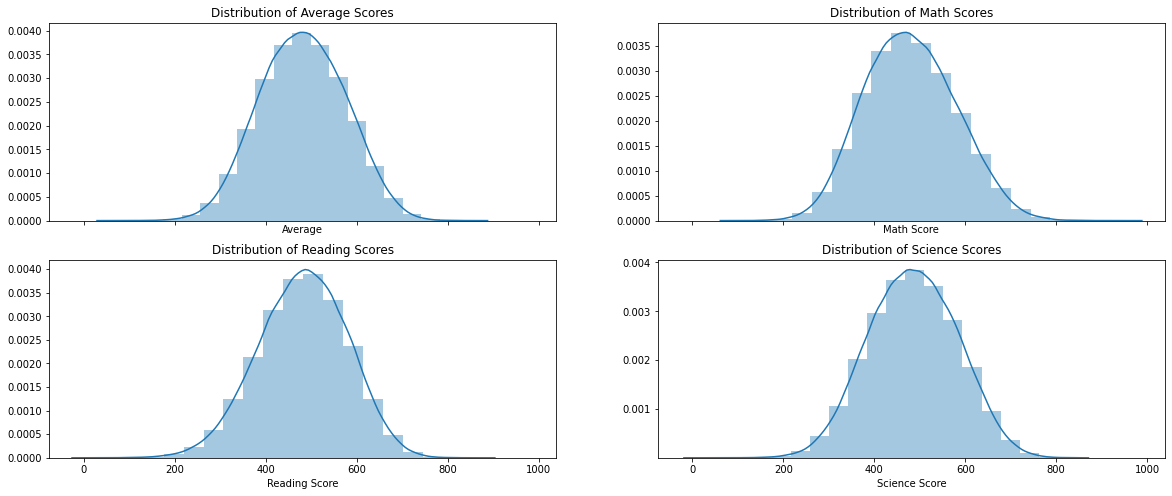

In [99]:
# draw histograms for average, math,reading and science scores
f, ax = plt.subplots(2, 2, figsize=(20, 8), sharex=True)
plt.yticks([0.001,0.002,0.003,0.004])

dist_plot('Average',0,0,"Distribution of Average Scores")
dist_plot('Math Score',0,1,"Distribution of Math Scores")
dist_plot('Reading Score',1,0,"Distribution of Reading Scores")
dist_plot('Science Score',1,1,"Distribution of Science Scores")

Test scores for all of the fiels  are normally distributed centering around 500.


# Parent Presence
## How many students have both parents? What is the distribution in parents' presence?

In [100]:
parent_counts = df['Parent'].value_counts()
parent_order=parent_counts.index

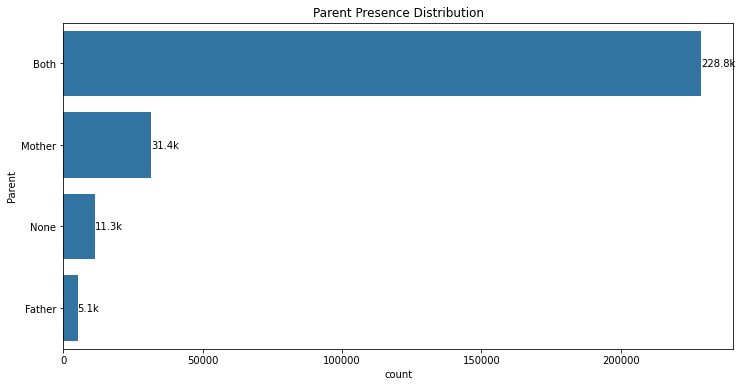

In [101]:
plt.figure(figsize=(12,6))
base_color = sb.color_palette()[0]
sb.countplot(data=df, y='Parent', color=base_color, order=parent_order);


# to print the proportion text on the bars
for i in range (parent_counts.shape[0]):
    count = parent_counts[i]
    # Convert count into a percentage, and then into string
    string1 = '{:0.1f}'.format(count/1000)
    string2=string1 + 'k'
    # Print the string value on the bar. 
    plt.text(count+1, i, string2, va='center')

plt.title('Parent Presence Distribution');

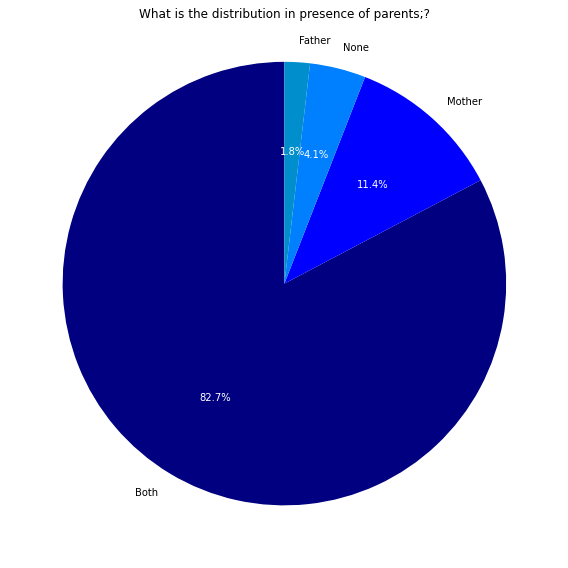

In [102]:
fig1, ax1 = plt.subplots(1, 1, figsize=(8,8), sharex=True)
patches, texts, autotexts = ax1.pie(df['Parent'].value_counts(), 
                                    colors = ['#000080', '#0000FF','#0080ff','#008ecc'],
                                    labels=['Both', 'Mother', 'None','Father'], 
                                    startangle=90,
                                    autopct='%1.1f%%',
                                   );
for text in texts:
    text.set_color('black')
    
for text in autotexts:
    text.set_color('white')
    
plt.tight_layout();
plt.suptitle('What is the distribution in presence of parents;?');

Out of 276k students, 229k students have both parents present. %17.3 of the students either have single or none of the parents present.

# Mood: Happiness,Loneliness, Feeling Like Outsider
## How is the general mood of students?

Potisive feelings are set to 1 and increase in index means feelings become negative.

In [103]:
#create a function to draw barchart
def count_plot(column_name,i,title):
    ax[i].set_title(title)
    sb.countplot(data = df,y =column_name, color=base_color, ax=ax[i])
 

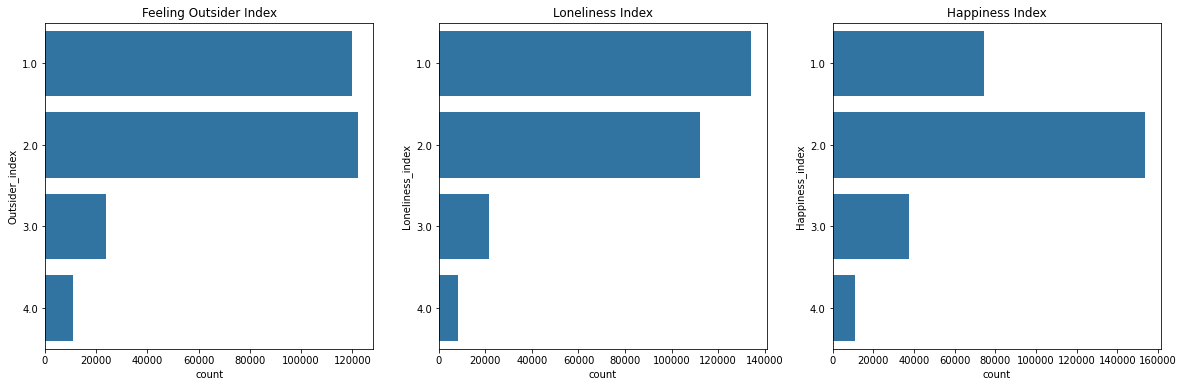

In [104]:
#draw barchart for each index type
fig, ax =plt.subplots(1,3,figsize=(20, 6))

count_plot('Outsider_index',0,"Feeling Outsider Index")
count_plot('Loneliness_index',1,"Loneliness Index")
count_plot('Happiness_index',2,"Happiness Index")

- Students mostly strongly disagree to feel like an outsider and feel lonely.
- Also most of the students agree on feeling happy at school.

<a id='bi'></a>

# Bivariate Exploration
## Does the presence of the parents' matters when it comes the academic success of the children?

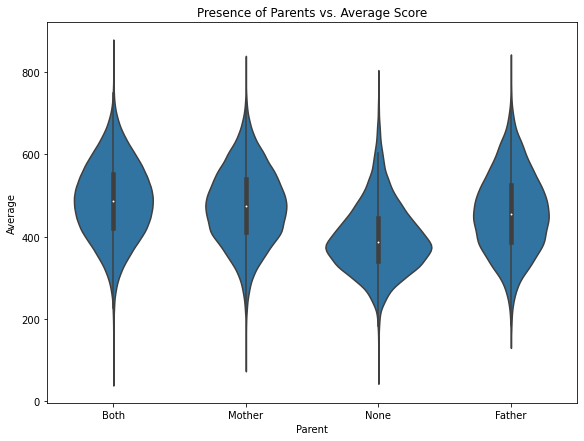

In [105]:
#draw violinplot to observe distribution
plt.figure(figsize=(9.5,7))
sb.violinplot(data = df,x ='Parent', y='Average' , color=base_color);
plt.title("Presence of Parents vs. Average Score");

It is observed that the loss of parents has a negative effect on scores. The average score distribution of students and those who lost both parents is the lowest.
#### Let's check if it is consistent over different subjects.

In [106]:
#custom function to draw violinplot
def violin_plot(column_name,i,title):
    sb.violinplot(data = df,x ='Parent', y=column_name , color=base_color, ax=ax[i])
    ax[i].set_title(title)

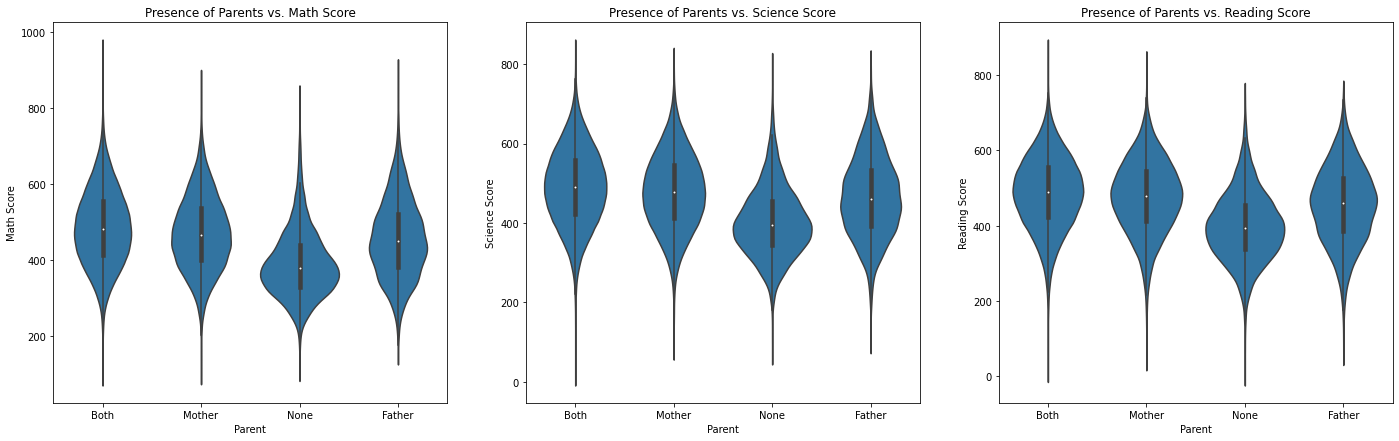

In [107]:
#draw violinplot for each score type
f, ax = plt.subplots(1, 3, figsize=(24, 7), sharex=True)

violin_plot('Math Score',0,"Presence of Parents vs. Math Score")
violin_plot('Science Score',1,"Presence of Parents vs. Science Score")
violin_plot('Reading Score',2,"Presence of Parents vs. Reading Score")

It is observed that the loss of a parent has a consistent negative effect on different subjects as well.

<a id='multi'></a>
# Mulvariate Exploration

## What is the correlation between scores and feelings?

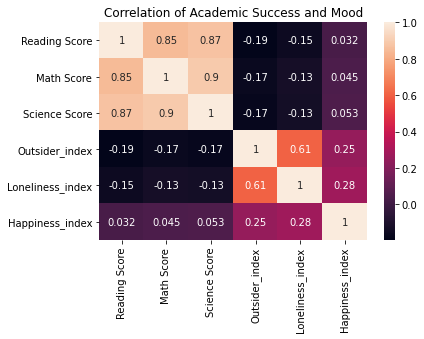

In [108]:
sb.heatmap(data=df[['Reading Score','Math Score','Science Score','Outsider_index','Loneliness_index','Happiness_index']].corr(),annot=True);
plt.title("Correlation of Academic Success and Mood");

All of the scores are strongly correlated, science and math scores have the strongest correlation.
Feeling outsider and feeling lonely has a negative but insignificant correlation with scores.

## How is feeling outsider, feeling of loneliness, presence of parents, and average scores are related?



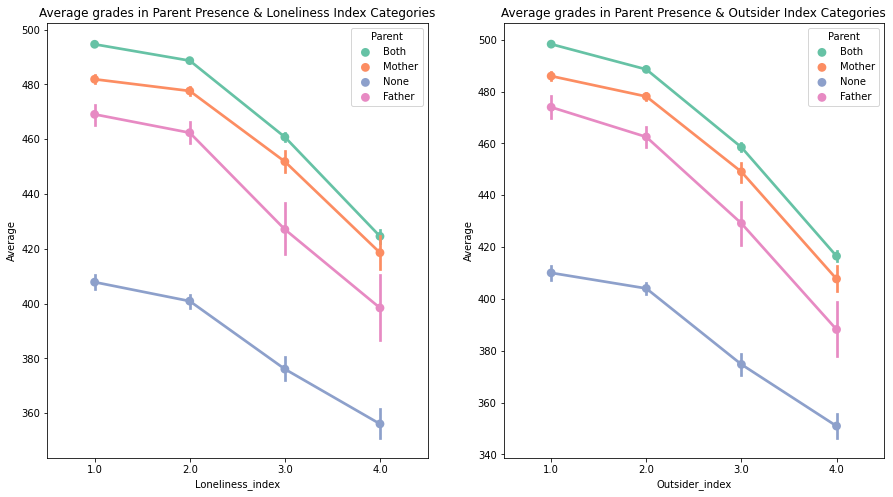

In [109]:
f, ax = plt.subplots(1, 2, figsize=(15, 8), sharex=True)

sb.pointplot(data = df,x ='Loneliness_index', y ='Average', hue='Parent', color=base_color,inner=None,palette="Set2",ax=ax[0]);
ax[0].set_title("Average grades in Parent Presence & Loneliness Index Categories")

sb.pointplot(data = df,x ='Outsider_index', y ='Average', hue='Parent', color=base_color,inner=None,palette="Set2",ax=ax[1]);
ax[1].set_title("Average grades in Parent Presence & Outsider Index Categories");

We understand student who feels lonelier and like an outsider has lower average scores regardless of the presence of parents. Also, the loss of a parent has a negative effect on average results. Which was also observed above.
It is also observed that variability is bigger when both parents are not present.  Variability in average scores is highest when only the father is present. 

## How is happiness, presence of parents, and average scores are related?

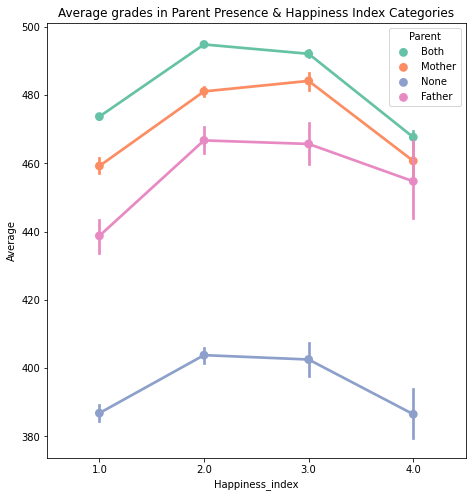

In [110]:
plt.figure(figsize=(7.5,8))
sb.pointplot(data = df,x ='Happiness_index', y ='Average', hue='Parent', color=base_color,inner=None,palette="Set2")
plt.title("Average grades in Parent Presence & Happiness Index Categories");

Students who strongly disagree and who strongly agree to feel happy at school have lower scores.
Also, the loss of a parent has a negative effect on average results as observed above. 
It is also observed that variability is bigger when both parents are not present.  Variability in average scores is highest when an only father is present.  

## How are average scores and happiness index distributed?
The graph above gave us inconsistent results with happiness and average scores, I would like to see how is average scores and happiness index distributed

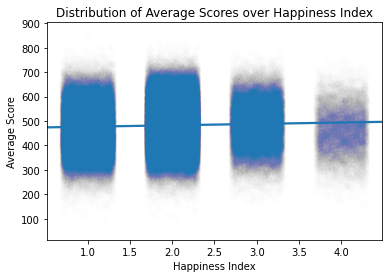

In [111]:
#draw regression plot add jitter and opaqueness for better visibility

sb.regplot(data=df, x='Happiness_index',y='Average', x_jitter=0.3,scatter_kws={'alpha':1/500});
plt.xlabel('Happiness Index')
plt.ylabel('Average Score')
plt.title('Distribution of Average Scores over Happiness Index');

The regression line that got fit suggests a slight upward trend in average scores but this is not clear from the data.
I added jitter and opaqueness but the center is still pretty indistinguishable. 



## Let's create a heatmap as an alternative. 

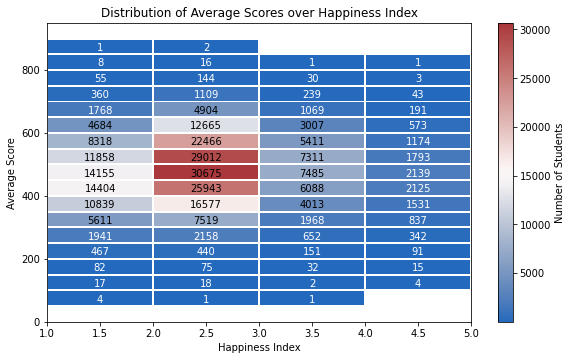

In [112]:
#draw heatmap
plt.figure(figsize=(9.5,5.5))
ybins=np.arange(0,900+100,50)
xbins=np.arange(1,5+1,1)
heatmap=plt.hist2d(data=df, x='Happiness_index',y='Average',bins=[xbins,ybins],edgecolor='white', cmap = 'vlag', cmin = 0.5);


plt.xlabel('Happiness Index')
plt.ylabel('Average Score');
plt.colorbar(label = 'Number of Students')
plt.title('Distribution of Average Scores over Happiness Index')

#Loop through the cell and print annotations each in heatmap cell
counts=heatmap[0]
for i in range(counts.shape[0]):
    for j in range(counts.shape[1]):
        c = counts[i,j]
        c =c.astype(int)
        if c>2500:
            plt.text(xbins[i]+0.5, ybins[j]+22, int(c),
                         ha = 'center', va = 'center', color = 'black')
        elif c>0:
            plt.text(xbins[i]+0.5, ybins[j]+22, int(c),
                     ha = 'center', va = 'center', color = 'white')



We observed that out of 276K students, most of the students agrees to feel happy at school and more than 60K of them scores between 450 and 550.
